<a href="https://colab.research.google.com/github/TheEPIC-saga/AIML-LABS-IIIT/blob/main/Module01_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install britannica-dictionary
!pip install wikipedia


import wikipedia
from dictionary.britannica import get_entries, get_definitions, get_word_of_the_day
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

In [ ]:
topic1 = 'Indonesia'
topic2 = 'Badminton'
eng1=get_definitions('Fascism')
wikipedia.set_lang('sl')
slovenian1 = wikipedia.page(topic1).content
slovenian2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

In [ ]:
es1

'INDONESIAOFICIALMENTELAREPBLICADEINDONESIAENINDONESIOESUNPASENELSUDESTEDEASIAYOCEANAENTRELOSOCANOSNDICOYPACFICOSECOMPONEDEMSDEISLASINCLUIDASSUMATRAJAVACLEBESYPARTESDEBORNEOYNUEVAGUINEAINDONESIAESELESTADOARCHIPELGICOMSGRANDEDELMUNDOYELDECIMOCUARTOPASMSGRANDEPORREACONKILMETROSCUADRADOSCONALREDEDORDEMILLONESDEPERSONASINDONESIAESELCUARTOPASMSPOBLADODELMUNDOYELPASDEMAYORAMUSULMANAMSPOBLADOJAVALAISLAMSPOBLADADELMUNDOALBERGAAMSDELAMITADDELAPOBLACINDELPASINDONESIAESUNAREPBLICACONUNPODERLEGISLATIVOYUNPRESIDENTEELEGIDOPORSUFRAGIOSUCAPITALESNUSANTARAAUNQUESUCIUDADMSPOBLADAESYAKARTAANTERIORCAPITALDELPASHASTAAGOSTODESIENDOMAYORITARIAMENTEUNARCHIPILAGOELPASCOMPARTEFRONTERASTERRESTRESCONPAPANUEVAGUINEATIMORORIENTALYMALASIAOTROSPASESCERCANOSAINDONESIAINCLUYENASINGAPURTAILANDIAFILIPINASPALAOSAUSTRALIAYELTERRITORIOINDIODELASISLASDEANDAMNYNICOBARELARCHIPILAGOINDONESIOHASIDOUNAREGINIMPORTANTEPARAELCOMERCIOMUNDIALDESDEELSIGLOVIICUANDOELREINODESRIVIJAYACOMENZELCOMERCIOCONCHINAYLAINDIAGRADUALMENTELOSGOBERNA

In [ ]:
def cleanup(text):
  text = text.upper()  # make it lowercase
  text = re.sub('[^A-Z]+', '', text) # only keep characters
  return text

In [ ]:
slovenian1 = cleanup(slovenian1)
slovenian2 = cleanup(slovenian2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [ ]:
print(slovenian2)

BADMINTONJEPORTPRIKATEREMSEUPORABLJATALOPARINPERNATAOGICAIZPLUTOVINEIGRALECPOSKUAUDARITIOGICOPREKOMREEVNASPROTNIKOVOPOLJEIGRASELAHKOTUDIVPARIHLOPARJEDOLGPRIBLINOCMVOGICOIZPLUTEPREMERCMTEAGSOZATAKNJENAPERESADOLINECMIGRIEDOLINEMRAZPOLAVLJAMVISOKAMREAODLETAJEBADMINTONTUDIOLIMPIJSKADISCIPLINAZNAILNOSTIIGREVEINAMISLIDAJEBADMINTONLAHKOTENPORTVENDARTONEDRIBADMINTONZAHTEVAHITREREFLEKSEHITROSTINVZDRLJIVOSTPRIIGRIJENAMREPOTREBNOIZREDNOHITROTEREKSPLOZIVNOGIBANJETUDINAZAJKARNINARAVNOGIBANJEINJEZALOVEKAIZREDNOTEAVNOHITROREAGIRANJEPREDVIDEVANJENASPROTNIKOVIHPOTEZTERPREPOZNAVANJETIVARANJAKONASPROTNIKNAKAENEKAJNAREDIPAKAJPOPOLNOMADRUGEGASPREMLJANJEGIBANJAIZREDNOHITRIHOGICKIOBNEKATERIHUDARCIHVPRVIHMETRIHCELOPRESEGAJOKMHKLJUBTEMUJEBADMINTONPRIMERENZAIGRALCEVSEHSTAROSTITERSPOSOBNOSTIVNASPROTJUZDRUGIMIPORTIZLOPARJEMNPRTENISOMNAMREZAUITEKPRIIGRINISOPOTREBNEPOSEBNESPRETNOSTIALIZNANJEZARADITEGAJEBADMINTONPOMNENJUNEKATERIHZELOZANIMIVPORTPRIHODNOSTISAJVSPLONEMPOMANJKANJUASAPREDSTAVLJAPRAVOREITEVZAHITROTERINTEN

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

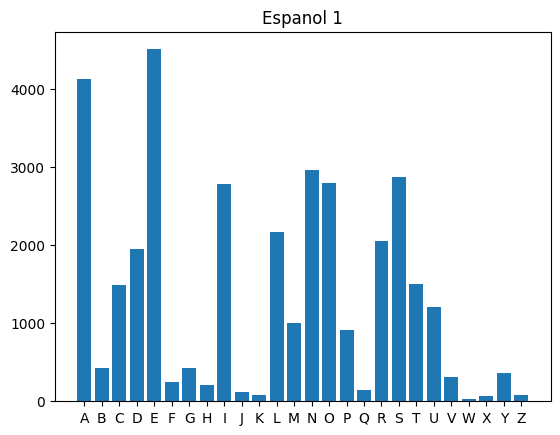

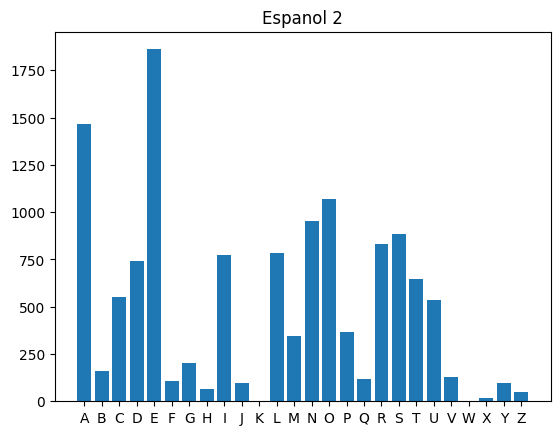

In [ ]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Espanol 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Espanol 2')
plt.show()

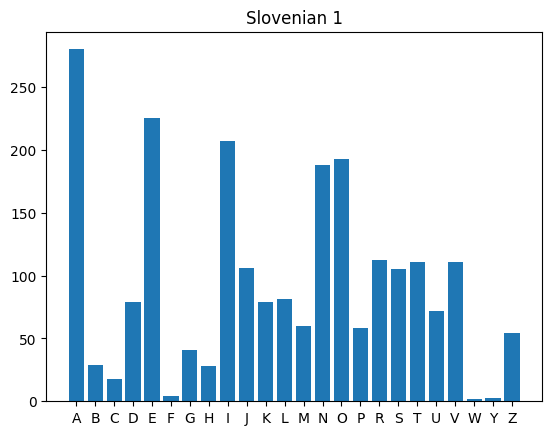

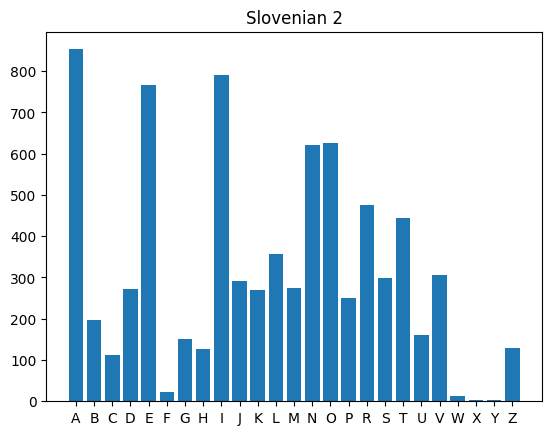

In [ ]:
unigram_slovenian1 = Counter(ngrams(slovenian1,1))
plothistogram(unigram_slovenian1)
plt.title('Slovenian 1')
plt.show()
unigram_slovenian2 = Counter(ngrams(slovenian2,1))
plothistogram(unigram_slovenian2)
plt.title('Slovenian 2')
plt.show()

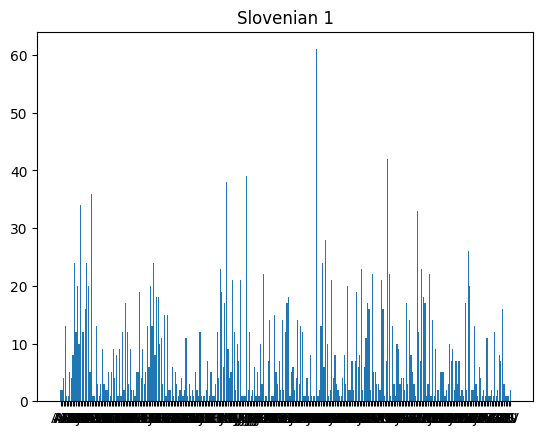

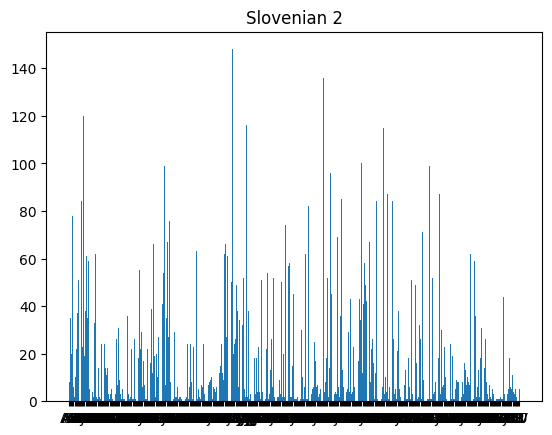

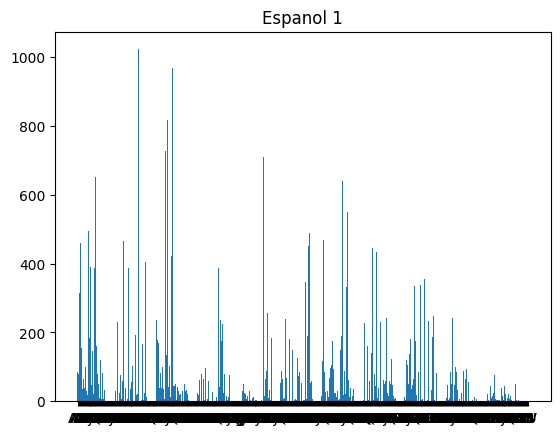

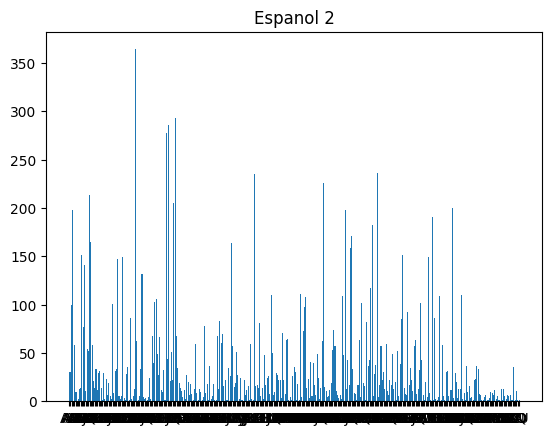

In [ ]:
bigram_slovenian1 = Counter(ngrams(slovenian1,2)) # bigrams
plothistogram(bigram_slovenian1)
plt.title('Slovenian 1')
plt.show()

bigram_slovenian2 = Counter(ngrams(slovenian2,2))
plothistogram(bigram_slovenian2)
plt.title('Slovenian 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
plothistogram(bigram_es1)
plt.title('Espanol 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Espanol 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((30,30))
  for ii in range(30):
    for jj in range(30):
      freq[ii,jj] = ngram[(chr(ord('A')+ii), chr(ord('A')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

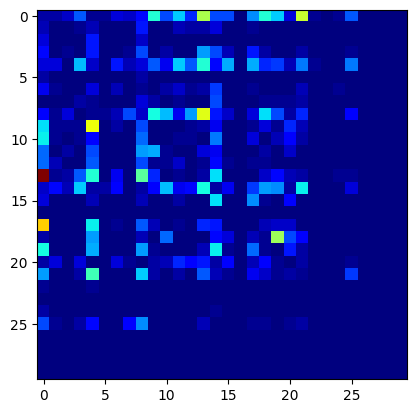

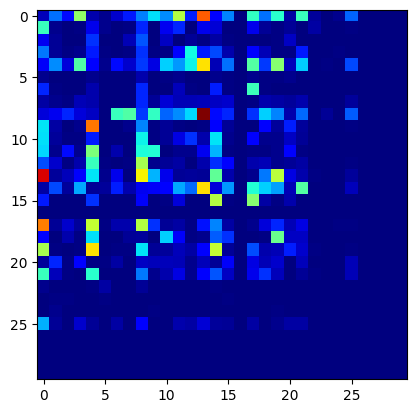

In [ ]:
bislovenian1 = plotbihistogram(bigram_slovenian1)
plt.show()
bislovenian2 = plotbihistogram(bigram_slovenian2)

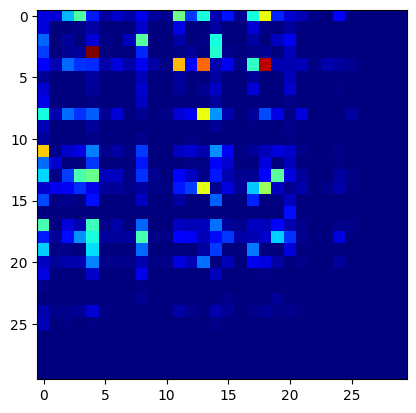

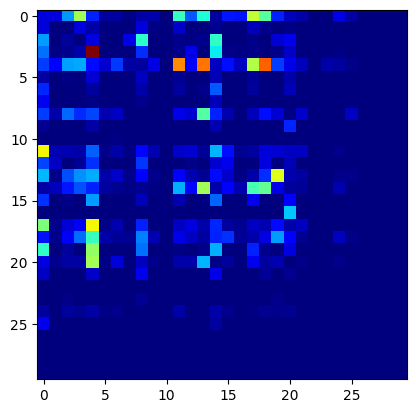

In [ ]:
bies1 = plotbihistogram(bigram_es1)
plt.show()
bies2 = plotbihistogram(bigram_es2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nSlovenian 1:')
ShowTopN(bislovenian1)
print('\nSlovenian 2:')
ShowTopN(bislovenian2)
print('\nEspanol 1:')
ShowTopN(bies1)
print('\nEspanol 2:')
ShowTopN(bies2)


Slovenian 1:
('p', 'a') : 61.0
('t', 'q') : 42.0
('k', 'o') : 39.0
('j', 't') : 38.0
('a', 'v') : 36.0
('a', 'n') : 34.0
('v', 'n') : 33.0
('p', 'i') : 28.0
('y', 'k') : 26.0
('p', 'e') : 24.0

Slovenian 2:
('j', 't') : 148.0
('p', 'a') : 136.0
('a', 'n') : 120.0
('k', 'o') : 116.0
('t', 'q') : 115.0
('q', 'r') : 100.0
('f', 'd') : 99.0
('w', 'c') : 99.0
('p', 'i') : 96.0
('t', 'u') : 87.0

Espanol 1:
('d', 'q') : 1022.0
('f', 'i') : 967.0
('f', 'd') : 818.0
('f', 'b') : 727.0
('m', 's') : 708.0
('a', 's') : 651.0
('j', 't') : 647.0
('q', 'r') : 641.0
('q', 'w') : 551.0
('a', 'l') : 495.0

Espanol 2:
('d', 'q') : 364.0
('f', 'i') : 293.0
('f', 'd') : 286.0
('f', 'b') : 277.0
('t', 'u') : 236.0
('m', 's') : 235.0
('p', 't') : 226.0
('a', 'r') : 213.0
('f', 'h') : 205.0
('x', 'g') : 200.0


# Using a different source i.e., other than wikipedia.
# Britannica Dictionary

In [ ]:
eng1=get_definitions('Fascism')
eng2=get_entries('Python')
eng1=str(eng1)
eng2=str(eng2)

"[{'text': 'python(noun)', 'link': 'https://www.britannica.com/dictionary/python'}]"

In [ ]:
eng1=cleanup(eng1)
eng2=cleanup(eng2)

In [ ]:
eng2

'TEXTPYTHONNOUNLINKHTTPSWWWBRITANNICACOMDICTIONARYPYTHON'

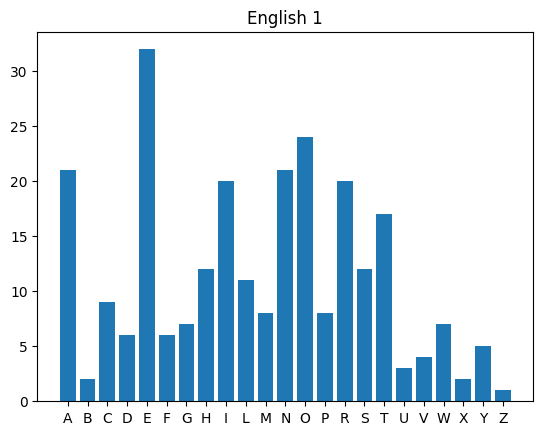

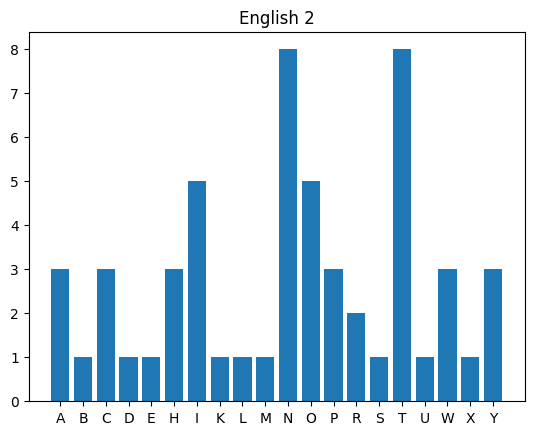

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

##Trigrams and Higher N-grams

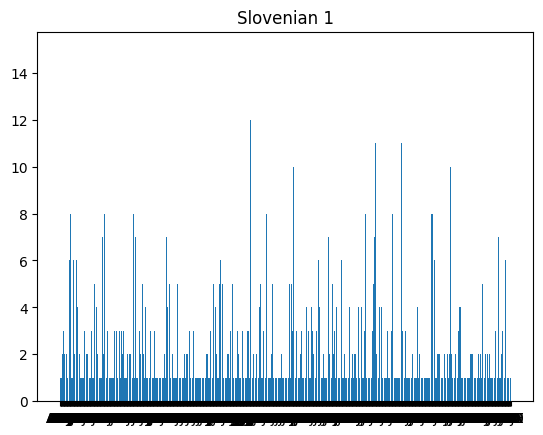

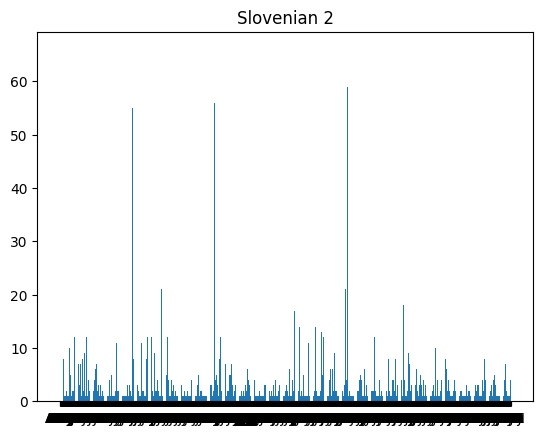

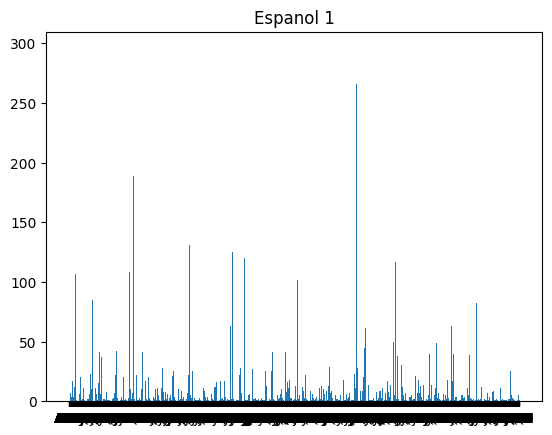

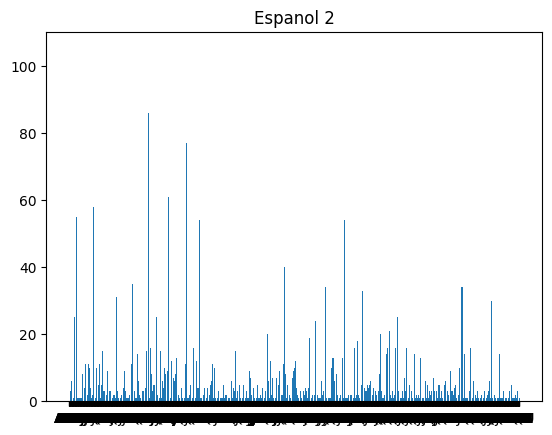

In [ ]:
trigram_slovenian1 = Counter(ngrams(slovenian1,3))
plothistogram(trigram_slovenian1)
plt.title('Slovenian 1')
plt.show()

trigram_slovenian2 = Counter(ngrams(slovenian2,3))
plothistogram(trigram_slovenian2)
plt.title('Slovenian 2')
plt.show()

trigram_es1 = Counter(ngrams(es1,3))
plothistogram(trigram_es1)
plt.title('Espanol 1')
plt.show()

trigram_es2 = Counter(ngrams(es2,3))
plothistogram(trigram_es2)
plt.title('Espanol 2')
plt.show()

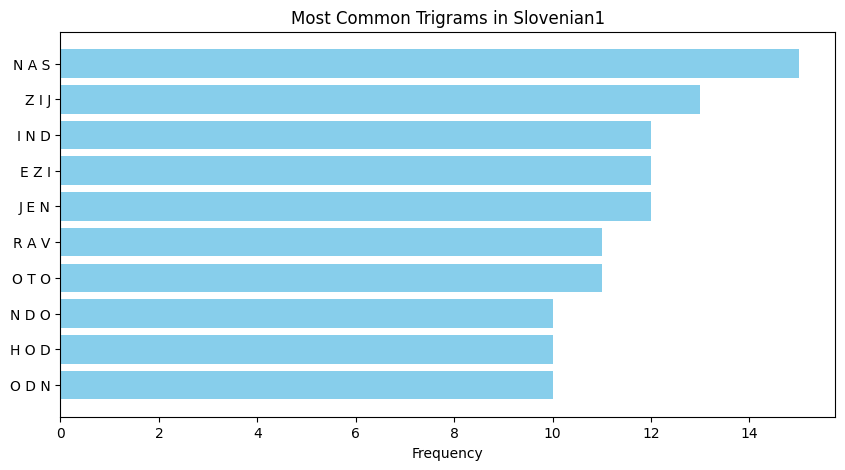

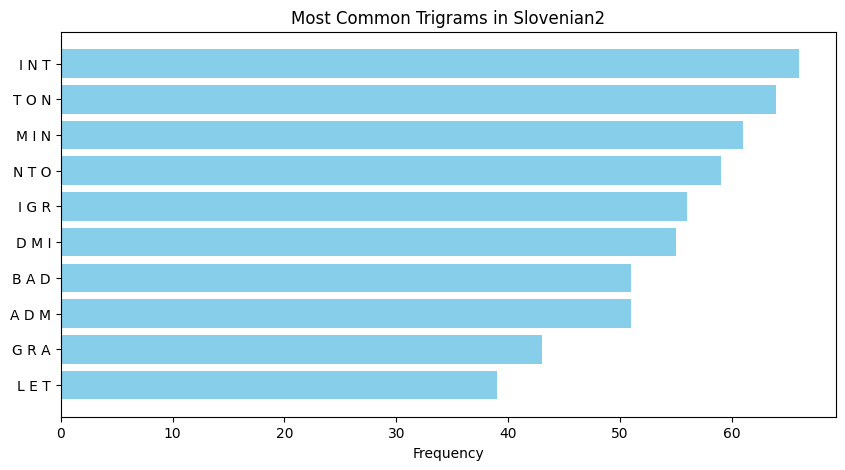

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
labels, values = zip(*trigram_slovenian1.most_common(10))
labels = [' '.join(label) for label in labels]  # Convert tuple to string

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Common Trigrams in Slovenian1')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

labels, values = zip(*trigram_slovenian2.most_common(10))
labels = [' '.join(label) for label in labels]  # Convert tuple to string

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Common Trigrams in Slovenian2')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

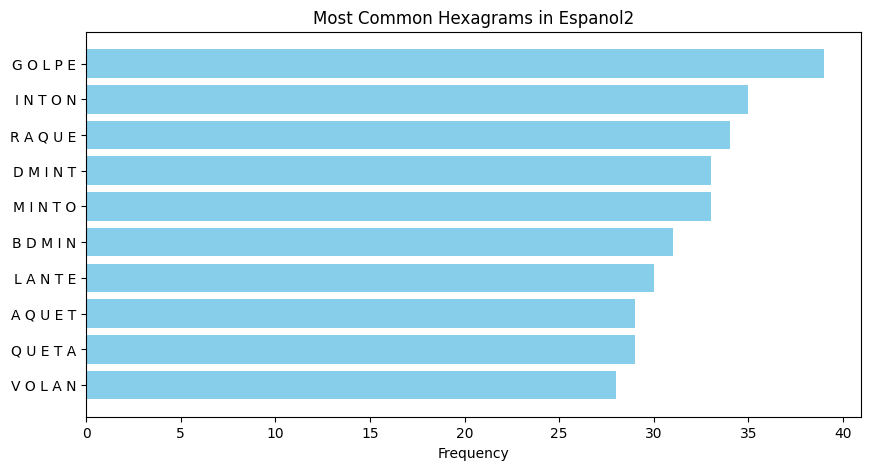

In [ ]:
hexagram_es2 = Counter(ngrams(es2,5))
labels, values = zip(*hexagram_es2.most_common(10))
labels = [' '.join(label) for label in labels]  # Convert tuple to string

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Common Hexagrams in Espanol2')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

##Part 2: Written numbers

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
no3 = train_X[train_y==3,:,:]
no7 = train_X[train_y==7,:,:]

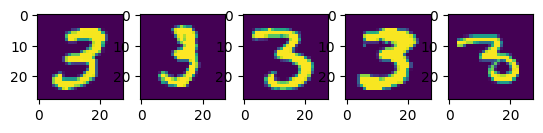

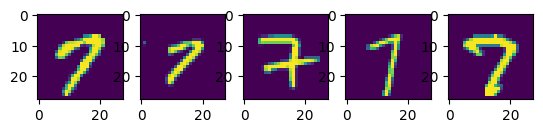

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no7[ii,:,:])
plt.show()

In [ ]:
sum3 = np.sum(no3>0, (1,2)) # threshold before adding up
sum7 = np.sum(no7>0, (1,2))

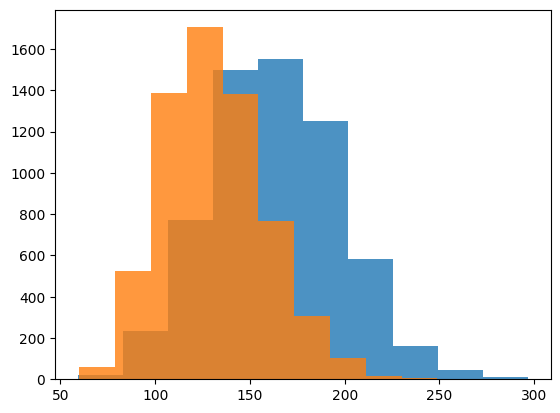

In [ ]:
plt.hist(sum3, alpha=0.8);
plt.hist(sum7, alpha=0.8);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

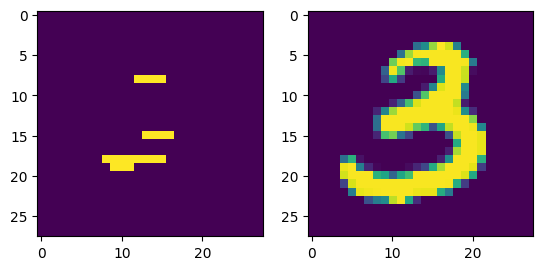

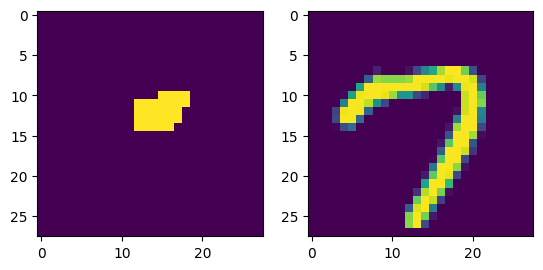

In [ ]:
imgs = [no3[456,:,:],  no7[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

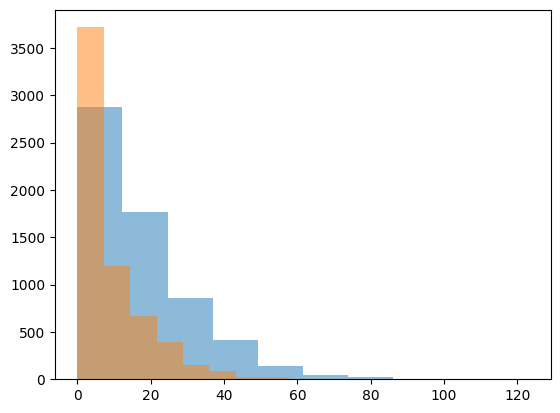

In [ ]:
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole7 = np.array([getHolePixels(i).sum() for i in no7])

plt.hist(hole3, alpha=0.5);
plt.hist(hole7, alpha=0.5);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

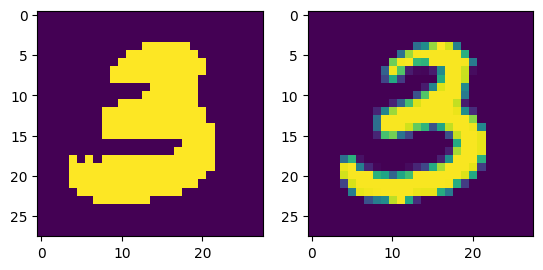

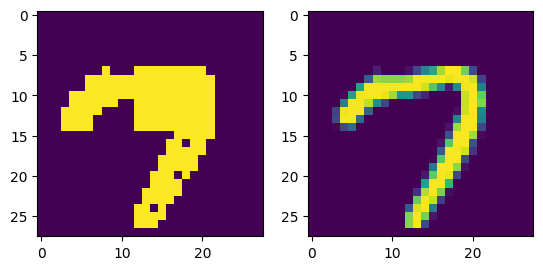

In [ ]:
imgs = [no3[456,:,:],  no7[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

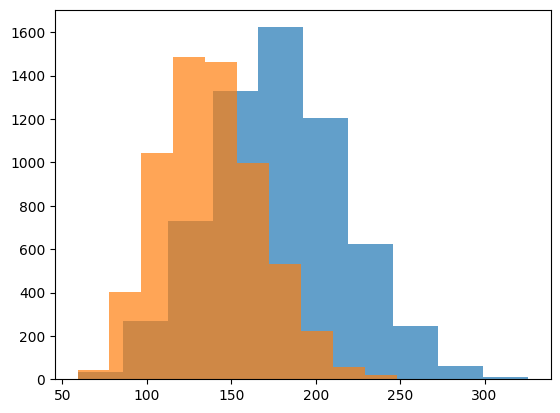

In [ ]:
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull7 = np.array([getHullPixels(i).sum() for i in no7])

plt.hist(hull3, alpha=0.7);
plt.hist(hull7, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

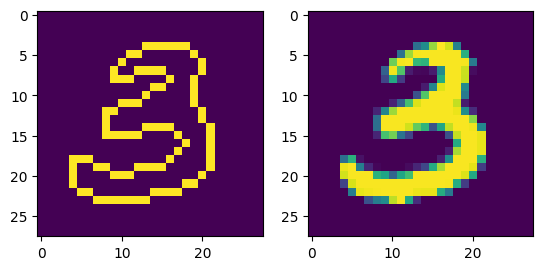

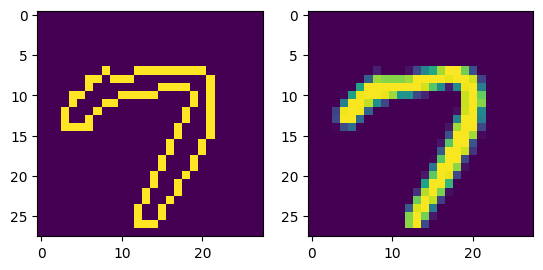

In [ ]:
imgs = [no3[456,:,:],  no7[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

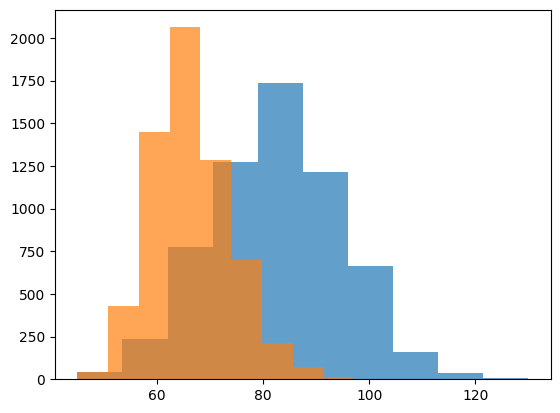

In [ ]:
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound7= np.array([getBoundaryPixels(i).sum() for i in no7])

plt.hist(bound3, alpha=0.7);
plt.hist(bound7, alpha=0.7);

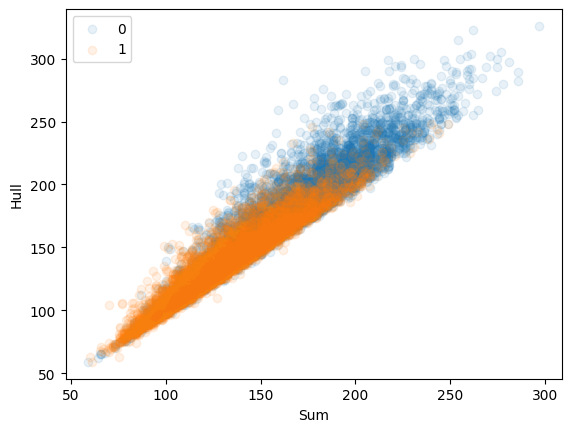

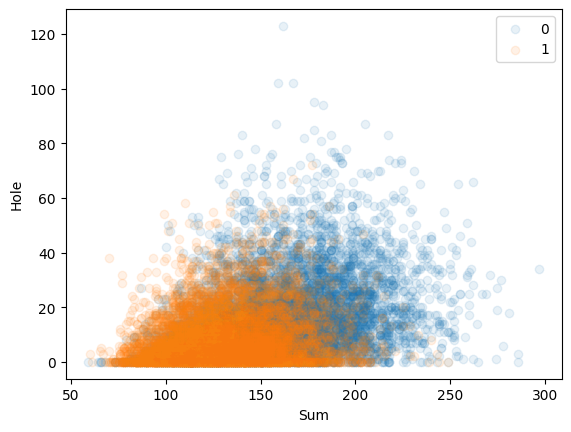

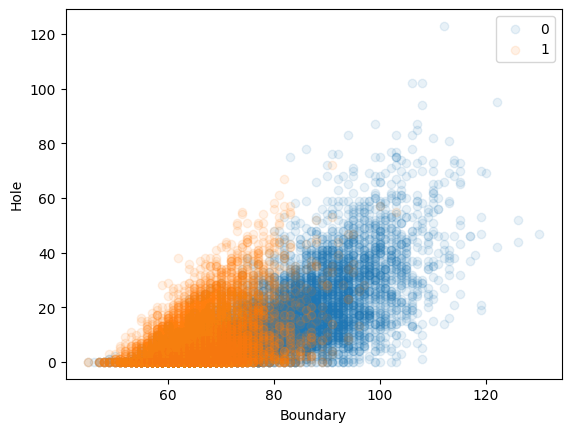

In [ ]:
# Sum and hull
plt.scatter(sum3, hull3, alpha=0.1)
plt.scatter(sum7, hull7, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum3, hole3, alpha=0.1)
plt.scatter(sum7, hole7, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound3, hole3, alpha=0.1)
plt.scatter(bound7, hole7, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl3 = ['class 3']*len(sum3)
cl7 = ['class 7']*len(sum7)
df = pd.DataFrame(list(zip(np.concatenate((hole3, hole7)), np.concatenate((sum3,sum7)),
                           np.concatenate((bound3,bound7)), np.concatenate((cl3, cl7)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

###Taking 3 classes

In [ ]:
#taking another number
no8 = train_X[train_y==8,:,:]
sum8 = np.sum(no8>0, (1,2))
hole8 = np.array([getHolePixels(i).sum() for i in no8])
hull8 = np.array([getHullPixels(i).sum() for i in no8])
bound8 = np.array([getBoundaryPixels(i).sum() for i in no8])

In [ ]:
cl3 = ['class 3']*len(sum3)
cl7 = ['class 7']*len(sum7)
cl8 = ['class 8']*len(sum8)
df = pd.DataFrame(list(zip(np.concatenate((hole3, hole7,hole8)), np.concatenate((sum3,sum7,sum8)),
                           np.concatenate((bound3,bound7,bound8)), np.concatenate((cl3, cl7,cl8)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.09)
fig.show()

##Using 5 features

In [ ]:
pr3 = ['property 3']*len(hole3)
pr7 = ['property 7']*len(hole7)
pr8 = ['property 8']*len(hole8)
df = pd.DataFrame(list(zip(np.concatenate((hole3, hole7,hole8)), np.concatenate((sum3,sum7,sum8)),np.concatenate((pr3,pr7,pr8)),
                           np.concatenate((bound3,bound7,bound8)), np.concatenate((cl3, cl7,cl8)))),
               columns =['Hole', 'Sum', 'Boundary','Property', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class',animation_frame='Property',opacity=0.09)
fig.show()
fig = px.scatter_3d()

Best combination of features is the one including all features as it gives insight while comparing various factors.If a combination has to be choosed with limited number of features then correlativity,permutations etc must be taken into consideration.I personally opine that sum and hole combination is the best in the above scenarios as it gives insights into the total number of pixels and the number of black pixels or the pixels which do not directly contribute in the shape formation of the number/digit.
But more the features, more useful is the model.